# 필요한 라이브러리 설치

In [1]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


# 인스타그램 해시태그 크롤링

In [76]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys
import time
import re

In [81]:
def insta_searching(word):  #word라는 매개변수를 받는 insta_searching 이라는 함수 생성
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

# 페이지 다운
def page_down(driver, num):
    body = driver.find_element(By.CSS_SELECTOR,'body')
    body.click()
    for i in range(num):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(1)

In [86]:
# Chrome WebDriver 서비스 시작
ser = Service('../chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service=ser)
driver2 = webdriver.Chrome(service=ser)

url = 'https://www.instagram.com/'
driver.get(url)
driver2.get(url)
time.sleep(3)

# 인스타그램 계정 로그인
email = ''   # 계정 정보 수정 필요
password = ''     # 비밀번호 정보 수정 필요

# 이메일과 비밀번호 입력
input_id = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'input[name="username"]')))
input_id.clear()
input_id.send_keys(email)

input_pw = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'input[name="password"]')))
input_pw.clear()
input_pw.send_keys(password)

try:
    # 로그인 버튼 클릭
    login_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'button[type="submit"]')))
    login_button.click()
    time.sleep(3)
except TimeoutException:
    print("로그인 버튼이 발견되지 않았습니다. 선택자를 확인하고 다시 시도해보세요.")

# 나중에 저장 버튼 클릭
save_button = WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, "//div[contains(text(),'나중에 하기')]")))
save_button.click()
time.sleep(3)

############################################################
# 이메일과 비밀번호 입력
input_id = WebDriverWait(driver2, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'input[name="username"]')))
input_id.clear()
input_id.send_keys(email)

input_pw = WebDriverWait(driver2, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'input[name="password"]')))
input_pw.clear()
input_pw.send_keys(password)

try:
    # 로그인 버튼 클릭
    login_button = WebDriverWait(driver2, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'button[type="submit"]')))
    login_button.click()
    time.sleep(3)
except TimeoutException:
    print("로그인 버튼이 발견되지 않았습니다. 선택자를 확인하고 다시 시도해보세요.")

# 나중에 저장 버튼 클릭
save_button = WebDriverWait(driver2, 70).until(EC.element_to_be_clickable((By.XPATH, "//div[contains(text(),'나중에 하기')]")))
save_button.click()
time.sleep(3)


# word = '수원경희대맛집'
# url = insta_searching(word)
url = 'https://www.instagram.com/yeongtongwhere/'
driver.get(url)
time.sleep(60)


hashtags = []

# 첫번째 게시물 열기
try:
    first_post = driver.find_elements(By.CSS_SELECTOR, '._ac7v._al3n')
    print(len(first_post))
    for f in first_post:
        posts = f.find_elements(By.CSS_SELECTOR, '._aabd._aa8k._al3l')
        print(len(posts))
        for p in posts:
            tag = p.find_element(By.TAG_NAME, 'a')
            link = tag.get_attribute('href')
            print(link)
            driver2.get(link)        
            try:
                content = WebDriverWait(driver2, 500).until(EC.presence_of_element_located((By.CSS_SELECTOR, '._a9zr')))
                print(content.text)
                hashtags.append(content.text)  # 해시태그 정보를 리스트에 추가
            except NoSuchElementException:
                print("컨텐츠를 찾을 수 없습니다.")
                continue
            
            time.sleep(10)
            page_down(driver2, 30)
    time.sleep(10)
except TimeoutException:
    print("첫 번째 게시물을 찾을 수 없습니다.")

# 해시태그 정보 출력
print("해시태그 정보:")
for tag in hashtags:
    print(tag)

# 브라우저 종료
driver.quit()
driver2.quit()

4
3
https://www.instagram.com/p/CUcI0PxPVv9/
yeongtongwhere
캠핑은 가고 싶지만 텐트치긴 귀찮을때👀
⛺️경기도 글램핑 캠핑장 추천🏕
조금씩 쌀쌀해지는 요즘🍂
숯불에 삼겹살 구워서
시원한 맥주 한 잔에🍺
산뜻한 자연의 공기 느껴보쉴?🍃

@나랑 같이 캠핑 갈 사람🙋🏻‍♀️
86주
https://www.instagram.com/p/CgbllIxvfGt/
yeongtongwhere
당신이 찐영통인이라면 맞출 수 있는
2022학년도 영통인 테스트!

힌트: 사진 클릭하기

@@너도 해봐~몇개 맞췄어?
.
.
.
.
.
.
.
--------------------------------------------------
<정답>
1. 중상 시계탑 2. 경희대 정문 3. 광교 호수공원 4. 하얀풍차제과점 5. 화이트 스노우 6. 쏘칼로 7. 구매탄시장 8. 수누리 9. 미소곱창

<시험결과>
1-3개 : 타지인
4-6개 : 영통인
7-9개 : 영통박사
44주
https://www.instagram.com/p/CsxceTFL8m_/
yeongtongwhere
2023년 5월 ver.2
영통 신규 오픈가게 모음📁
멀리 나갈 거 없이 영통에서 해결 가능!
볼 것도 많고 먹을 것도 많아서 행복해💗

@@친구야 오늘의 플랜 여깄다😚

#수원 #수원맛집 #영통맛집 #영통어디가
#아도겐 #철길부산집 #에픽클라임
#팔각도 #잭바츠 #영흥수목원
#윤희와망고 #메릴리 #올데이보드게임카페
2일
3
https://www.instagram.com/p/CsqhJs6PuGL/
yeongtongwhere
영통에 새로생긴 #정든칼국수 ❣
진한 해물육수 + 직접 담근 김치조합!
막국수 느낌의 시원한 냉칼국수까지
이열치열 이한치한 모두 가능🤩

@@이거사줄사람 태그

#영통맛집 #수원맛집 #영통어디가
4일
https://www.instagram.com/p/Cr0GB4gL-UD/
yeongtongwhere
망포에서 줄서서 먹던 고깃집 3월 3일 🙂
영통에도 상륙했

In [87]:
FinalFile = []
FinalFile = hashtags
FinalFile

['yeongtongwhere\n캠핑은 가고 싶지만 텐트치긴 귀찮을때👀\n⛺️경기도 글램핑 캠핑장 추천🏕\n조금씩 쌀쌀해지는 요즘🍂\n숯불에 삼겹살 구워서\n시원한 맥주 한 잔에🍺\n산뜻한 자연의 공기 느껴보쉴?🍃\n\n@나랑 같이 캠핑 갈 사람🙋🏻\u200d♀️\n86주',
 'yeongtongwhere\n당신이 찐영통인이라면 맞출 수 있는\n2022학년도 영통인 테스트!\n\n힌트: 사진 클릭하기\n\n@@너도 해봐~몇개 맞췄어?\n.\n.\n.\n.\n.\n.\n.\n--------------------------------------------------\n<정답>\n1. 중상 시계탑 2. 경희대 정문 3. 광교 호수공원 4. 하얀풍차제과점 5. 화이트 스노우 6. 쏘칼로 7. 구매탄시장 8. 수누리 9. 미소곱창\n\n<시험결과>\n1-3개 : 타지인\n4-6개 : 영통인\n7-9개 : 영통박사\n44주',
 'yeongtongwhere\n2023년 5월 ver.2\n영통 신규 오픈가게 모음📁\n멀리 나갈 거 없이 영통에서 해결 가능!\n볼 것도 많고 먹을 것도 많아서 행복해💗\n\n@@친구야 오늘의 플랜 여깄다😚\n\n#수원 #수원맛집 #영통맛집 #영통어디가\n#아도겐 #철길부산집 #에픽클라임\n#팔각도 #잭바츠 #영흥수목원\n#윤희와망고 #메릴리 #올데이보드게임카페\n2일',
 'yeongtongwhere\n영통에 새로생긴 #정든칼국수 ❣\n진한 해물육수 + 직접 담근 김치조합!\n막국수 느낌의 시원한 냉칼국수까지\n이열치열 이한치한 모두 가능🤩\n\n@@이거사줄사람 태그\n\n#영통맛집 #수원맛집 #영통어디가\n4일',
 'yeongtongwhere\n망포에서 줄서서 먹던 고깃집 3월 3일 🙂\n영통에도 상륙했다는데~? 반달공원에 찐맛집 두두등장~\n3주',
 'yeongtongwhere\n5월 ver.\n영통 새로 오픈한 맛집 모음zip❤\n영통에 새로 생긴 맛집이 이렇게 많이?😮\n하나씩 차근차근 깨보자고~ 👊\n\n@@친구야 오늘은 어디 갈

In [ ]:
import pandas as pd

csv_file_path = "/Users/LG/Desktop/KHUDA/hashtags.csv"

# 데이터프레임 생성
df = pd.DataFrame({"Hashtags": FinalFile})

# CSV 파일로 저장 (한글 폰트를 위한 UTF-8 인코딩)
df.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

print("CSV 파일로 저장되었습니다.")

In [1]:
import pandas as pd

# CSV 파일 불러오기
data = pd.read_csv('/Users/LG/Desktop/hashtags.csv')
data

,Hashtags
0,yeongtongwhere\n영통에 새로생긴 #정든칼국수 ❣\n진한 해물육수 + 직...
1,yeongtongwhere\n망포에서 줄서서 먹던 고깃집 3월 3일 🙂\n영통에도 ...
2,yeongtongwhere\n5월 ver.\n영통 새로 오픈한 맛집 모음zip❤\n...
3,yeongtongwhere\n영통에 새로생긴 #정든칼국수 ❣\n진한 해물육수 + 직...
4,yeongtongwhere\n영통 중상 레트로술집 #노가리슈퍼 ❣️\n낭낭한 분위기...
...,...
147,yeongtongwhere\n你吃饭了吗?(니츠판러마?)\n중국음식 러버들 다 모여라...
148,yeongtongwhere\n你吃饭了吗?(니츠판러마?)\n중국음식 러버들 다 모여라...
149,yeongtongwhere\n2021년 1월 ver.\n리뉴얼되고 존맛탱으로 변신한...
150,yeongtongwhere\n2021년 1월 ver.\n리뉴얼되고 존맛탱으로 변신한...


In [2]:
# '#'가 제거된 열이름 출력
data2 = pd.read_csv('/Users/LG/Desktop/hashtags2.csv')
data2['Hashtags'] = data2['Hashtags'].str.replace('^#', '')
data2

/var/folders/sc/g31h4x0x4tg1ndt0f3_ld66m0000gn/T/ipykernel_5987/65565322.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data2['Hashtags'] = data2['Hashtags'].str.replace('^#', '')


,Hashtags,Unnamed: 1
0,정든칼국수,진한 해물육수 + 직접 담근 김치조합!\n막국수 느낌의 시원한 냉칼국수까지\n이열치...
1,3월3일 영통직영점,망포에서 줄서서 먹던 고깃집🙂\n영통에도 상륙했다는데~? 반달공원에 찐맛집 두두등장~
2,노가리슈퍼,영통 중상 레트로술집 ❣️\n낭낭한 분위기 + 바삭한 전주황태 한입에~\n달달구리 ...
3,문어상회 🐙,제철 굴김치 + 문어숙회 + 돼지수육\n삼합으로 한입에 싹~~~ 먹고 <3\n문어해...
4,노마세야갈비찜,추운 날씨에 먹기 딱인 노마세야 갈비찜\n이번에 가리비 갈비찜 메뉴까지 재출시!\n...
...,...,...
144,수타원,큰 소갈비 덩어리가 들어가는 갈비짬뽕! 소뼈로 우린 육수에 칼칼함가지 JMT
145,포명천천\n,맛과 가성비를 한방에 해결해주는 맛집! 삼선짬뽕에 오징어 한마리 듬뿍 담아줌ㅜㅜ
146,948키친,샐러드바가 무한리필인 맛집\n종류도 다양해서 애슐리 빰치는 곳 푸파ㄱ
147,저크트럭,여기 소고기 불초밥 존맛.\n달달한 데리야끼소스 잔뜩+생양파 얇게 올라가서 개꿀맛


# 워드클라우드 생성

In [2]:
conda install -c conda-forge wordcloud

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install stylecloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import pandas as pd
from konlpy.tag import Twitter
from collections import Counter

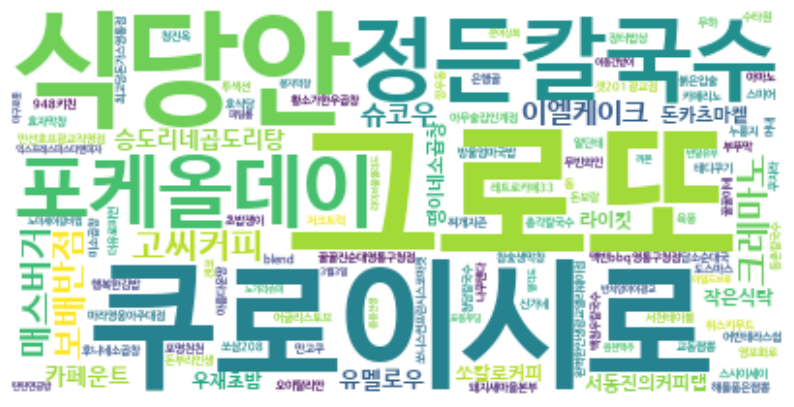

In [4]:
# CSV 파일 불러오기
data2 = pd.read_csv('/Users/LG/Desktop/hashtags2.csv')

# 텍스트 데이터 추출
text_data = data2['Hashtags'].astype(str)

# 해시태그 단어 추출 및 필터링
hashtags = text_data.str.findall(r'#(\w+)').explode().str.lower()

# 단어의 빈도수 계산
word_counts = hashtags.value_counts()

# 워드 클라우드 생성
font_path = '/Users/LG/Desktop/나눔 글꼴/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothicBold.ttf'
wordcloud = WordCloud(background_color='white', font_path=font_path)

wordcloud.generate_from_frequencies(word_counts)

# 워드 클라우드 표시
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

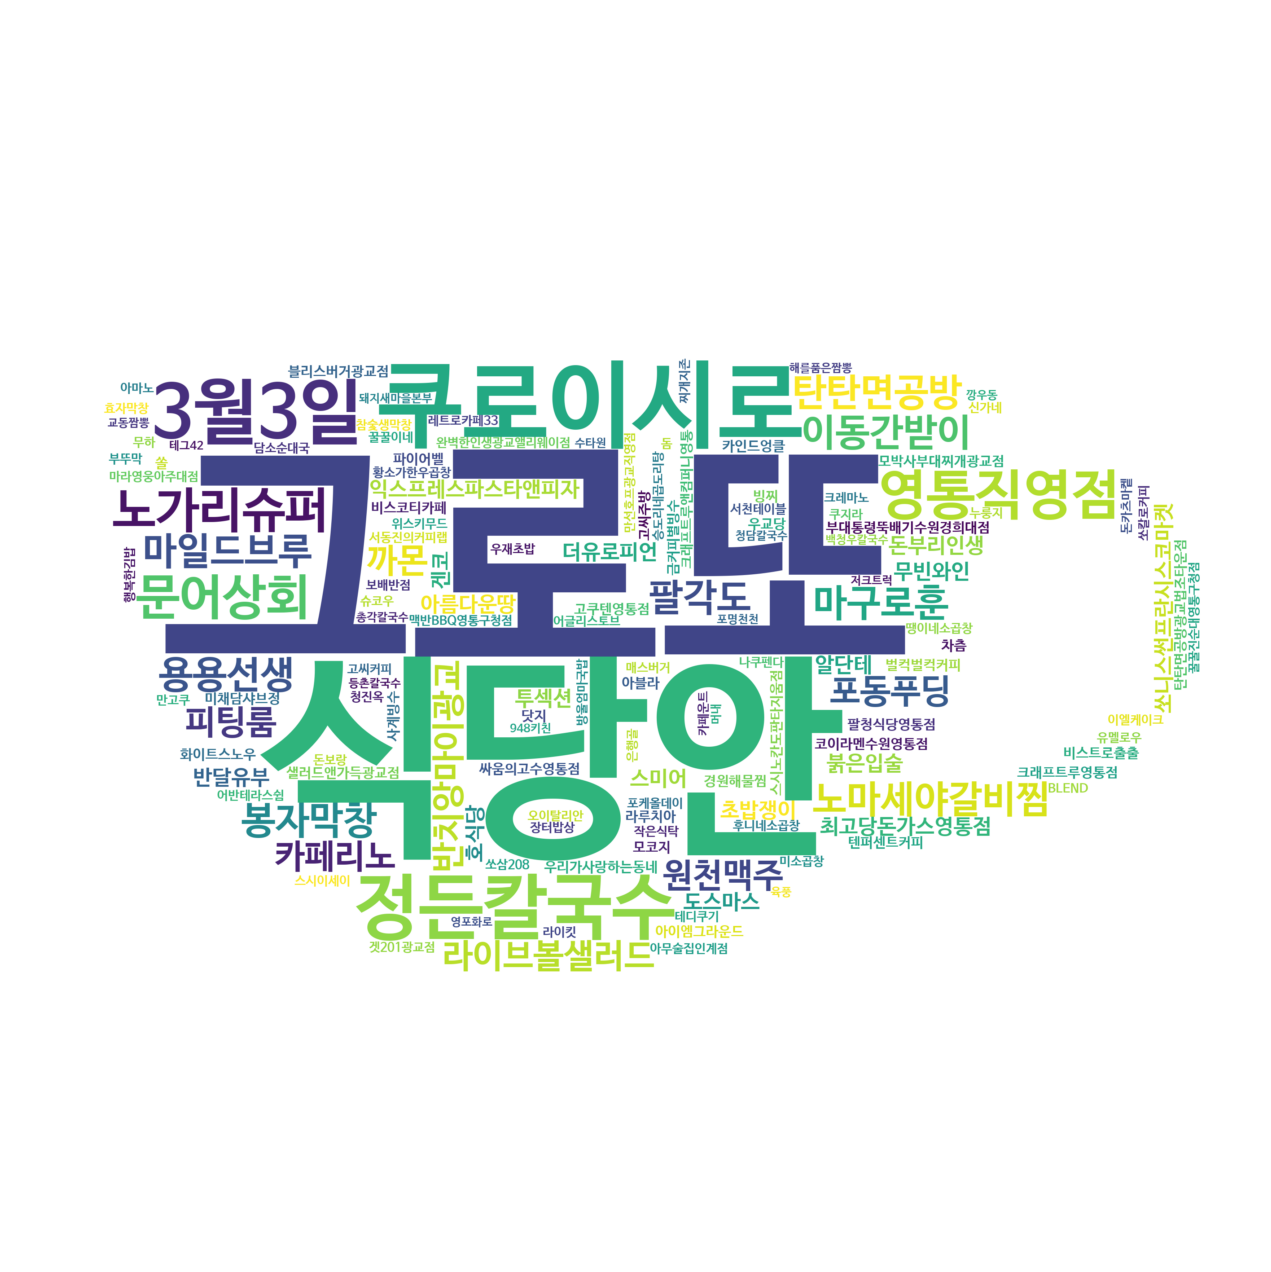

In [27]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# CSV 파일 불러오기
data2 = pd.read_csv('/Users/LG/Desktop/hashtags2.csv')

# 텍스트 데이터 추출
text_data = data2['Hashtags'].astype(str)

# 해시태그 단어 추출 및 필터링
hashtags = text_data.str.findall(r'#(\w+)').explode().str.lower()

# 단어의 빈도수 계산
word_counts = hashtags.value_counts()

# 원하는 모양의 마스크 이미지 파일 경로
custom_mask_path = '/Users/LG/Desktop/cup.jpeg'

# 마스크 이미지 로드
custom_mask = np.array(Image.open(custom_mask_path))

# 한글 폰트 경로 지정
font_path = '/Users/LG/Desktop/나눔 글꼴/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothicBold.ttf'

# WordCloud 객체 생성
wordcloud = WordCloud(background_color='white', mask=custom_mask, font_path=font_path)

# 텍스트 데이터를 문자열로 변환하여 기반으로 워드 클라우드 생성
text_data_str = ' '.join(text_data.tolist())
wordcloud.generate(text_data_str)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

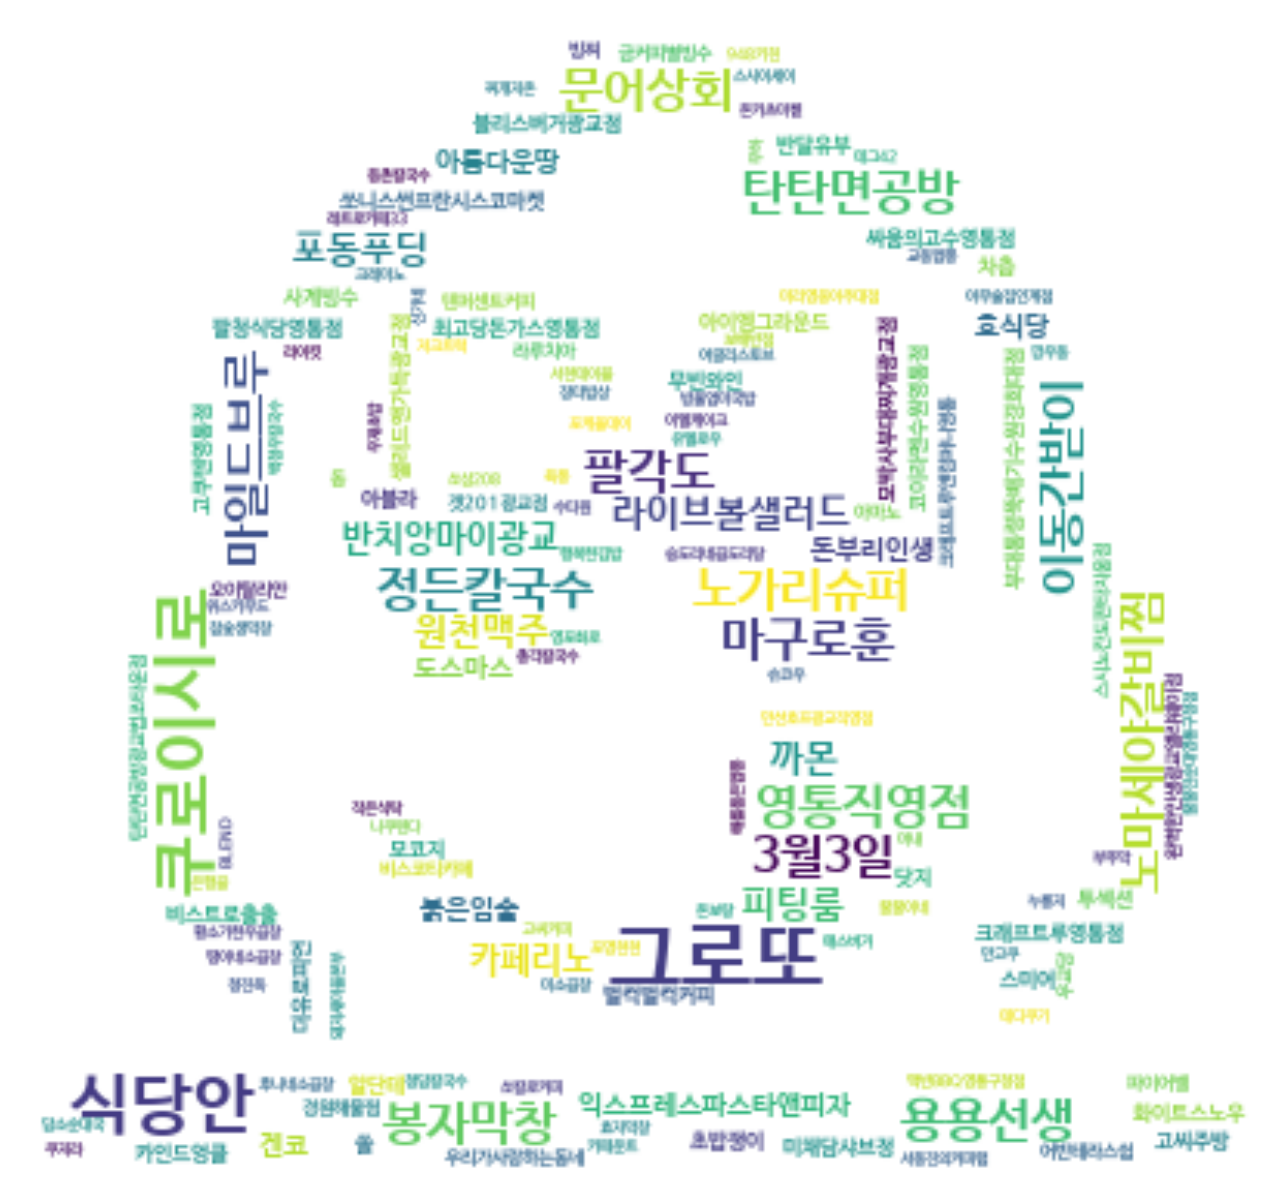

In [34]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# CSV 파일 불러오기
data2 = pd.read_csv('/Users/LG/Desktop/hashtags2.csv')

# 텍스트 데이터 추출
text_data = data2['Hashtags'].astype(str)

# 해시태그 단어 추출 및 필터링
hashtags = text_data.str.findall(r'#(\w+)').explode().str.lower()

# 단어의 빈도수 계산
word_counts = hashtags.value_counts()

# 원하는 모양의 마스크 이미지 파일 경로
custom_mask_path = '/Users/LG/Desktop/michelin.jpeg'

# 마스크 이미지 로드
custom_mask = np.array(Image.open(custom_mask_path))

# 한글 폰트 경로 지정
font_path = '/Users/LG/Desktop/나눔 글꼴/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothicBold.ttf'

# WordCloud 객체 생성
wordcloud = WordCloud(background_color='white', mask=custom_mask, font_path=font_path)

# 텍스트 데이터를 문자열로 변환하여 기반으로 워드 클라우드 생성
text_data_str = ' '.join(text_data.tolist())
wordcloud.generate(text_data_str)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()